In [2]:
import pandas as pd

import spacy # pip install spacy  
from spacy import displacy
from spacy.symbols import nsubj, VERB

nlp = spacy.load("en_core_web_sm") # english language model
# python -m spacy download en_core_web_sm   --> in anaconda prompt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

dp = pd.DataFrame(columns = ['text','lemma','pos','tag','shape','is_aplha','is_stop'] , index = range(30))

p = 0
for token in doc:
    dp.iloc[p,:] = [token.text, token.lemma_, token.pos_, token.tag_,token.shape_, token.is_alpha, token.is_stop]
    p += 1
    
dp.dropna()

,text,lemma,pos,tag,shape,is_aplha,is_stop
0,Apple,Apple,PROPN,NNP,Xxxxx,True,False
1,is,be,AUX,VBZ,xx,True,True
2,looking,look,VERB,VBG,xxxx,True,False
3,at,at,ADP,IN,xx,True,True
4,buying,buy,VERB,VBG,xxxx,True,False
5,U.K.,U.K.,PROPN,NNP,X.X.,False,False
6,startup,startup,NOUN,NN,xxxx,True,False
7,for,for,ADP,IN,xxx,True,True
8,$,$,SYM,$,$,False,False
9,1,1,NUM,CD,d,False,False


In [117]:
text = 'It took me more than two hours to translate a few pages of English.'

for token in nlp(text):
    print(token.text,'=>', token.dep_,'=>',token.head.text)

It => nsubj => took
took => ROOT => took
me => dative => took
more => amod => two
than => quantmod => two
two => nummod => hours
hours => dobj => took
to => aux => translate
translate => xcomp => took
a => quantmod => few
few => amod => pages
pages => dobj => translate
of => prep => pages
English => pobj => of
. => punct => took


In [5]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

dp = pd.DataFrame(columns = ['text','label','vector'] , index = range(30))
p = 0

for ent in doc.ents:
    dp.iloc[p,:] = [ent.text,  ent.label_ , ent.vector]
    p += 1
    
dp.dropna()

,text,label,vector
0,Apple,ORG,"[-0.1254186, -0.30839404, 0.74106807, 0.658490..."
1,U.K.,GPE,"[1.2635587, 0.27649173, -0.12834686, 0.3702059..."
2,$1 billion,MONEY,"[0.5095323, 0.9765933, 0.3898208, -0.5182559, ..."


In [9]:
ent
ent.vector

$1 billion

array([ 0.5095323 ,  0.9765933 ,  0.3898208 , -0.5182559 ,  0.16050519,
       -0.28544685,  0.35728106,  0.6871338 ,  0.54009575,  0.22192848,
       -0.3345997 , -0.04941201,  0.06441905, -0.39982882,  1.2149742 ,
        0.05298506,  0.51519275,  1.3623962 , -0.3550065 , -0.71647197,
       -0.6492583 , -0.76205856, -0.05673649,  0.24150021, -0.41964486,
       -0.5845881 , -0.26511213,  0.9012814 ,  0.7621768 ,  0.0696528 ,
        0.3447046 ,  0.70310235, -0.06188397, -0.58462983,  1.5163212 ,
        0.49442747, -0.8708381 ,  0.84583807, -0.9106819 ,  0.24307114,
       -0.2661771 , -0.03642871,  0.6267485 , -0.07673866,  0.14559938,
        0.5841096 , -0.15101607, -0.27666458, -0.1258205 , -0.52919513,
        1.0225494 , -0.48952696,  0.0246109 , -0.4288781 ,  0.14068924,
        0.38972223, -0.72524023,  0.1439979 ,  0.03280932,  0.3943572 ,
       -1.1949879 , -0.24946146,  1.5790815 ,  0.44554162, -0.34016767,
       -0.57028383, -0.4863561 , -1.1067137 , -0.6339674 , -0.23

In [108]:
# vector_norm: The L2 norm of the token’s vector (the square root of the sum of the values squared)
ent.vector_norm

5.681034

In [109]:
doc = nlp("I was reading the paper.")
token = doc[0]  # 'I'

print(token.morph)  # 'Case=Nom|Number=Sing|Person=1|PronType=Prs'

print(token.morph.get("PronType")) 

Case=Nom|Number=Sing|Person=1|PronType=Prs
['Prs']


In [110]:
doc = nlp("Where are you?")
doc[2]
print(doc[2].morph)  # 'Case=Nom|Person=2|PronType=Prs'
print(doc[2].pos_)  # 'PRON'

you

Case=Nom|Person=2|PronType=Prs
PRON


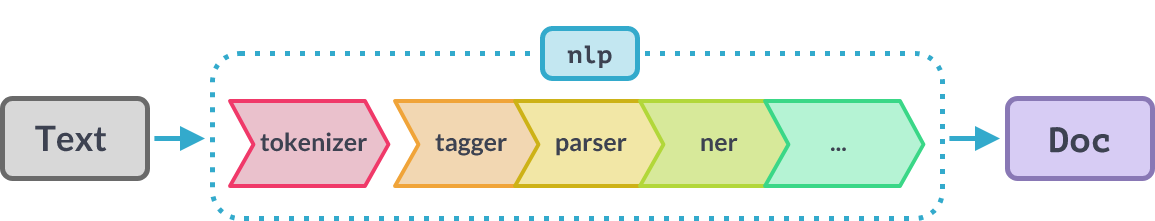

In [10]:
print(nlp.pipe_names)

doc5 = nlp(u'Apple to build a Hong Kong and Mumbai factory for $10 million')

for tokens in doc5:
    print(tokens)
    
print("===================",'\n\n')

print('entities.text' , '\t','entities.label_' ,'\t', 'spacy.explain(entities.label_)\n')

for entities in doc5.ents:
    print(entities.text ,'\t', entities.label_ ,'\t'*3, spacy.explain(entities.label_))

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Apple
to
build
a
Hong
Kong
and
Mumbai
factory
for
$
10
million


entities.text 	 entities.label_ 	 spacy.explain(entities.label_)

Apple 	 ORG 			 Companies, agencies, institutions, etc.
Hong Kong 	 GPE 			 Countries, cities, states
Mumbai 	 GPE 			 Countries, cities, states
$10 million 	 MONEY 			 Monetary values, including unit


In [ ]:
lemmatizer = nlp.get_pipe("lemmatizer")

In [56]:
# Load the tagger and parser but don't enable them
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser"])

# Explicitly enable the tagger later on
nlp.enable_pipe("tagger")

In [57]:
texts = ["Net income was $9.4 million compared to the prior year of $2.7 million.",
         "Revenue exceeded twelve billion dollars, with a loss of $1b."]

for doc in nlp.pipe(texts, disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer"]):
    # Do something with the doc here
    print([(ent.text, ent.label_) for ent in doc.ents])

[('$9.4 million', 'MONEY'), ('the prior year', 'DATE'), ('$2.7 million', 'MONEY')]
[('twelve billion dollars', 'MONEY'), ('1b', 'MONEY')]


In [114]:
a = 'India is a developing country'
b = 'India is a developing country'

d1 = nlp(a)
d2 = nlp(b)

d1.similarity(d2)

1.0

In [115]:
data = nlp(u"lion cat pet")

for t1 in data:
    for t2 in data:
        print(t1.text, t2.text, t1.similarity(t2))

lion lion 1.0
lion cat 0.6240272
lion pet 0.4594899
cat lion 0.6240272
cat cat 1.0
cat pet 0.5829491
pet lion 0.4594899
pet cat 0.5829491
pet pet 1.0


<ipython-input-115-d82d036730c8>:5: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(t1.text, t2.text, t1.similarity(t2))


# Stopwords

In [62]:
print(nlp.Defaults.stop_words)

{'him', 'in', 'whatever', 'only', 'everyone', 'few', 'seeming', 'often', 'anything', 'thereby', 'made', 'mine', 'just', 'always', '’d', 'i', 'after', 'keep', 'from', 'an', 'are', 'sometimes', 'themselves', '‘ll', 'so', 'what', 'whereas', 'whole', 'rather', 'elsewhere', 'hereupon', "'re", 'hereafter', 'afterwards', '’s', 'used', 'done', 'top', 'at', 'thus', 'moreover', 'thru', 'onto', 'once', 'herein', 'for', 'something', 'formerly', 'anyhow', 'latterly', 'until', 'yours', 'fifty', 'will', 'last', 'or', 'whereafter', 'first', 'than', 'alone', 'becomes', 'twenty', 'say', 'she', 'everything', 'further', 'same', 'before', 'somehow', 'your', 'during', 'there', 'he', "'s", 'you', 'us', 'move', 'more', 'everywhere', 'whenever', '‘m', 'twelve', 'therein', "'m", 'most', 'under', 'full', 'here', 'on', 'being', 'be', 'were', 'now', 'towards', 'every', 'else', 'much', 'seemed', 'enough', 'whence', 'their', 'namely', 'nor', 'by', 'regarding', 'herself', 'my', 'did', 'none', 'became', 'seems', 'hers

In [63]:
len(nlp.Defaults.stop_words)

326

In [64]:
# it it a  stopword
t = 'mango','tango','jango','therefore'
[nlp.vocab[i].is_stop for i in t]

[False, False, False, True]

In [65]:
nlp.Defaults.stop_words.add('mango')
nlp.Defaults.stop_words.remove('mango')

# displacy

In [102]:
text = """In ancient Rome, some neighbors live in three adjacent houses.
          In the center is the house of Senex, who lives there with wife Domina, son Hero, and several slaves,
          including head slave Hysterium and the musical's main character Pseudolus. A slave belonging to Hero,
          Pseudolus wishes to buy, win, or steal his freedom. One of the neighboring houses is owned by Marcus Lycus,
          who is a buyer and seller of beautiful women; the other belongs to the ancient Erronius,
          who is abroad searching for his long-lost children (stolen in infancy by pirates).
          One day, Senex and Domina go on a trip and leave Pseudolus in charge of Hero.
          Hero confides in Pseudolus that he is in love with the lovely Philia,
          one of the courtesans in the House of Lycus."""

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
sentence_spans = list(doc.sents)
displacy.render(sentence_spans, style = "dep")

In [103]:
text = "When Sebastian Thrun started working on self-driving cars at Google in 2007,\
        few people outside of the company took him seriously."
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
displacy.render(doc, style="ent")

In [105]:
doc = nlp("India is a developing country and Delhi 23 Apple $100 on Samsung It's on way!\
           himalayas  Geo  Good luck to we Indians and we speak english India 100% hindi dollar US NASA UK ")
nlp = spacy.load("en_core_web_sm")
displacy.render(doc, style="ent" , jupyter=True)

In [104]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence about Google.")
doc.user_data["title"] = "This is a title"
displacy.render(doc, style="ent")